In [1]:
from keras.datasets import boston_housing
import numpy as np
import os
import keras
from keras import backend as K
from keras import models, layers
from keras.callbacks import EarlyStopping
from keras.losses import mean_absolute_percentage_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
(train_data, train_targets), (test_data, test_targets) =boston_housing.load_data()
df = np.concatenate((train_data, train_targets.reshape(-1, 1)), axis=1)
df_test = np.concatenate((test_data, test_targets.reshape(-1, 1)), axis=1)

In [3]:
df = pd.DataFrame(df, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV'])
df_test = pd.DataFrame(df_test, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV'])
train_data = df.drop('MEDV', axis=1)
train_targets = df['MEDV']

test_data = df_test.drop('MEDV', axis=1)
test_targets = df_test['MEDV']

# Data Preprocessing

In [4]:
#確認重複值
train_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
399    False
400    False
401    False
402    False
403    False
Length: 404, dtype: bool

In [5]:
#確認遺失值
train_data.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,False,False,False,False,False,False,False,False,False,False,False,False,False
400,False,False,False,False,False,False,False,False,False,False,False,False,False
401,False,False,False,False,False,False,False,False,False,False,False,False,False
402,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# cannot include test data
mean=train_data.mean(axis=0)
#13features in the input data
train_data-=mean
std=train_data.std(axis=0) 
train_data/=std
# z-score data normalization
test_data-=mean
test_data/=std 

In [7]:
train_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.187169e-16,7.254923e-17,1.745578e-15,2.638154e-17,-5.201560e-15,6.399721e-15,2.682123e-16,5.100431e-16,-1.758769e-17,-1.450985e-16,2.362027e-14,6.028181e-15,6.155692e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.045989e-01,-4.830166e-01,-1.562759e+00,-2.565147e-01,-1.469447e+00,-3.812523e+00,-2.366108e+00,-1.285909e+00,-9.703661e-01,-1.309687e+00,-2.670441e+00,-3.766431e+00,-1.517782e+00
25%,-3.964699e-01,-4.830166e-01,-8.771342e-01,-2.565147e-01,-8.897023e-01,-5.527452e-01,-8.423437e-01,-8.192093e-01,-6.254735e-01,-7.627280e-01,-5.685332e-01,2.113387e-01,-8.065036e-01
50%,-3.761855e-01,-4.830166e-01,-2.076592e-01,-2.565147e-01,-1.650220e-01,-9.662282e-02,3.396253e-01,-2.945357e-01,-5.105093e-01,-4.561907e-01,2.835916e-01,3.874868e-01,-1.855136e-01
75%,-7.607953e-03,4.290703e-02,1.027052e+00,-2.565147e-01,6.278635e-01,4.817192e-01,8.979513e-01,6.786126e-01,1.673810e+00,1.563349e+00,7.835049e-01,4.396326e-01,5.998561e-01
max,9.223411e+00,3.724372e+00,2.442346e+00,3.888763e+00,2.674020e+00,3.462893e+00,1.109113e+00,3.433149e+00,1.673810e+00,1.833823e+00,1.601545e+00,4.475222e-01,3.477707e+00


In [8]:
train_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.271909,-0.483017,-0.435222,-0.256515,-0.165022,-0.176224,0.812055,0.116554,-0.625474,-0.594433,1.147078,0.447522,0.824198
1,-0.402927,2.988079,-1.332260,-0.256515,-1.213677,1.892000,-1.907995,1.246040,-0.855402,-0.348001,-1.716061,0.431371,-1.327556
2,0.124785,-0.483017,1.027052,-0.256515,0.627864,-1.827422,1.109113,-1.185969,1.673810,1.563349,0.783505,0.220344,-1.306880
3,-0.400996,-0.483017,-0.868325,-0.256515,-0.361112,-0.324156,-1.235140,1.105809,-0.510509,-1.093307,0.783505,0.447522,-0.652118
4,-0.005627,-0.483017,1.027052,-0.256515,1.326967,0.153452,0.693948,-0.577856,1.673810,1.563349,0.783505,0.389399,0.263171


In [9]:
train_data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
399,-0.381500,-0.483017,-0.615804,-0.256515,-0.932331,-0.937015,-0.250912,1.156247,-0.740438,-1.039213,-0.261768,0.447522,0.476830
400,-0.387740,0.358461,-0.608463,-0.256515,-0.795920,-0.038155,-1.886521,0.339240,-0.740438,-1.099318,0.056358,0.447522,-0.847857
401,-0.401532,0.989570,-0.740597,-0.256515,-1.018440,-0.332609,-1.635990,1.428632,-0.970366,-0.612465,-0.716235,0.079341,-0.676930
402,-0.172706,-0.483017,1.244338,-0.256515,2.674020,-0.786266,1.055428,-1.042782,-0.510509,-0.017422,-1.716061,-0.986421,0.420314
403,-0.403726,2.041417,-1.200126,-0.256515,-1.333036,0.474675,-1.797045,1.221215,-0.970366,-0.846875,-1.307041,0.232882,-1.152494


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [11]:
# 原始資料筆數
print("原始訓練資料筆數:", len(train_data))
# 預處理後的資料筆數
print("預處理後訓練資料筆數:", len(train_data))

原始訓練資料筆數: 404
預處理後訓練資料筆數: 404


In [12]:
if not os.path.exists('data_csv'):
    os.makedirs('data_csv')
    
train_data.to_csv('data_csv/df_boston_housing.csv', index=False)
test_data.to_csv('data_csv/df_test_boston_housing.csv', index=False)

# Model

In [13]:
#分訓練集和驗證集
train_data, x_val, train_targets, y_val = train_test_split(train_data, train_targets, test_size=0.2, random_state=42)

In [14]:
#mape、rmse
def mean_absolute_percentage_error(y_true, y_pred):
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true),K.epsilon(),None))
    return 100. * K.mean(diff, axis=-1)
def root_mean_square_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# 定義 Early Stopping 回調函數
early_stopping = EarlyStopping(monitor='val_loss',  # 監控 validation 
                               patience=20,         # 如果連續 n 次 epochs validation 沒有改善就停止訓練
                               restore_best_weights=True)  # 回復到最佳權重
#建構網路
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae',mean_absolute_percentage_error, root_mean_square_error])
history = model.fit(train_data, train_targets,validation_data=(x_val, y_val),epochs=100, batch_size=10,callbacks=[early_stopping], verbose=0)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae'] 
val_mae = history.history['val_mae']
mape = history.history['mean_absolute_percentage_error']
val_mape = history.history['val_mean_absolute_percentage_error'] 
rmse = history.history['root_mean_square_error']
val_rmse = history.history['val_root_mean_square_error']  

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
# 定義 Early Stopping 回調函數
early_stopping = EarlyStopping(monitor='val_loss',  # 監控 validation 
                               patience=20,         # 如果連續 n 次 epochs validation 沒有改善就停止訓練
                               restore_best_weights=True)  # 回復到最佳權重

# 這裡

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

#mape、rmse
def mean_absolute_percentage_error(y_true, y_pred):
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true),K.epsilon(),None))
    return 100. * K.mean(diff, axis=-1)

def root_mean_square_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def create_model(hidden_layers, hidden_units, activation, optimizer, learning_rate=None):
    model = Sequential()
    model.add(Dense(hidden_units, activation=activation, input_shape=(train_data.shape[1],)))
    for _ in range(hidden_layers - 1):
        model.add(Dense(hidden_units, activation=activation))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate) 
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae', mean_absolute_percentage_error, root_mean_square_error])
    return model

def train_model(model, epochs, batch_size, early_stop=None):
    callbacks = []
    if early_stop:
        callbacks.append(EarlyStopping(patience=early_stop))
    history = model.fit(train_data, train_targets, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2, callbacks=callbacks)
    return history

In [63]:
# Define parameters for experiments
experiments = [
    {'hidden_layers': 1, 'hidden_units': 1000, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 2, 'hidden_units': 1000, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 3, 'hidden_units': 1000, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001},
]

histories = []
batch = [256, 256, 256, 256]
patient = [20, 20, 20, 20]
for bsize, exp, patient in zip(batch, experiments, patient):
    model = create_model(exp['hidden_layers'], exp['hidden_units'], exp['activation'], exp['optimizer'], exp['learning_rate'])
    history = train_model(model, epochs=100, batch_size=bsize, early_stop = patient)
    histories.append(history)

plt.figure(figsize=(12, 8))

linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'x']

for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_val_mae = history_df['val_mae'].min()
    best_val_epoch = history_df['val_mae'].idxmin() + 1
    best_val_loss = history_df.loc[best_val_epoch - 1, 'val_loss']

    print(f"第{i+1}組參數: 在第 {best_val_epoch} EPOCH\n最好MAE: {best_val_mae}\nLOSS_mse: {best_val_loss}")
    plt.plot(history_df['val_mae'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation MAE - Experiment {i+1}')

plt.title('Validation MAE for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))

linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'x']
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_val_mean_absolute_percentage_error = history_df['val_mean_absolute_percentage_error'].min()
    best_val_epoch = history_df['val_mean_absolute_percentage_error'].idxmin() + 1
    best_val_loss = history_df.loc[best_val_epoch - 1, 'val_loss']

    print(f"第{i+1}組參數: 在第 {best_val_epoch} EPOCH\n最好mean_absolute_percentage_error: {best_val_mean_absolute_percentage_error}\nLOSS: {best_val_loss}")
    plt.plot(history_df['val_mean_absolute_percentage_error'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation mean_absolute_percentage_error - Experiment {i+1}')
plt.title('Validation mean_absolute_percentage_error for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('mean_absolute_percentage_error')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))

linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'x']
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_val_root_mean_square_error = history_df['val_root_mean_square_error'].min()
    best_val_epoch = history_df['val_root_mean_square_error'].idxmin() + 1
    best_val_loss = history_df.loc[best_val_epoch - 1, 'val_loss']

    print(f"第{i+1}組參數: 在第 {best_val_epoch} EPOCH\n最好root_mean_square_error: {best_val_root_mean_square_error}\nLOSS: {best_val_loss}")
    plt.plot(history_df['val_root_mean_square_error'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation root_mean_square_error - Experiment {i+1}')
plt.title('Validation root_mean_square_error for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('root_mean_square_error')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/100
2/2 - 1s - loss: 591.6772 - mae: 22.4165 - mean_absolute_percentage_error: 99.6879 - root_mean_square_error: 28.3767 - val_loss: 682.3981 - val_mae: 24.1502 - val_mean_absolute_percentage_error: 98.4131 - val_root_mean_square_error: 26.1228
Epoch 2/100
2/2 - 0s - loss: 577.6523 - mae: 22.1200 - mean_absolute_percentage_error: 98.1726 - root_mean_square_error: 23.2051 - val_loss: 667.7114 - val_mae: 23.8796 - val_mean_absolute_percentage_error: 97.2516 - val_root_mean_square_error: 25.8401
Epoch 3/100
2/2 - 0s - loss: 565.2697 - mae: 21.8606 - mean_absolute_percentage_error: 96.8982 - root_mean_square_error: 19.9585 - val_loss: 654.2861 - val_mae: 23.6210 - val_mean_absolute_percentage_error: 96.0885 - val_root_mean_square_error: 25.5790
Epoch 4/100
2/2 - 0s - loss: 553.5533 - mae: 21.6042 - mean_absolute_percentage_error: 95.5777 - root_mean_square_error: 24.0950 - val_loss: 641.5973 - val_mae: 23.3684 - val_mean_absolute_percentage_error: 94.9172 - val_root_mean_square_err

Epoch 1/100
2/2 - 0s - loss: 588.7334 - mae: 22.3903 - mean_absolute_percentage_error: 99.8074 - root_mean_square_error: 26.9842 - val_loss: 679.1988 - val_mae: 24.1090 - val_mean_absolute_percentage_error: 98.3623 - val_root_mean_square_error: 26.0614
Epoch 2/100
2/2 - 0s - loss: 575.6220 - mae: 22.1008 - mean_absolute_percentage_error: 98.2139 - root_mean_square_error: 26.0240 - val_loss: 665.8005 - val_mae: 23.8472 - val_mean_absolute_percentage_error: 97.1239 - val_root_mean_square_error: 25.8031
Epoch 3/100
2/2 - 0s - loss: 564.0163 - mae: 21.8421 - mean_absolute_percentage_error: 96.7997 - root_mean_square_error: 20.4074 - val_loss: 652.4415 - val_mae: 23.5851 - val_mean_absolute_percentage_error: 95.9089 - val_root_mean_square_error: 25.5429
Epoch 4/100
2/2 - 0s - loss: 552.4045 - mae: 21.5842 - mean_absolute_percentage_error: 95.4258 - root_mean_square_error: 24.8141 - val_loss: 639.1344 - val_mae: 23.3177 - val_mean_absolute_percentage_error: 94.6541 - val_root_mean_square_err

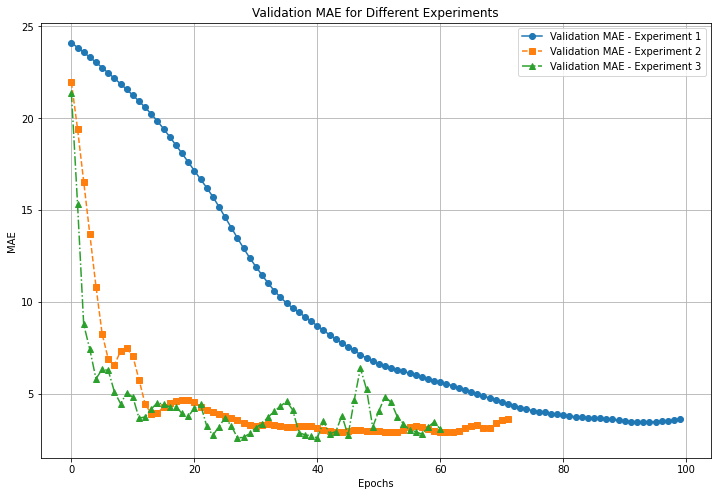

第1組參數: 在第 94 EPOCH
最好mean_absolute_percentage_error: 15.250870704650879
LOSS: 22.421157836914062
第2組參數: 在第 61 EPOCH
最好mean_absolute_percentage_error: 12.740260124206543
LOSS: 13.78432559967041
第3組參數: 在第 40 EPOCH
最好mean_absolute_percentage_error: 12.07855224609375
LOSS: 12.38696002960205


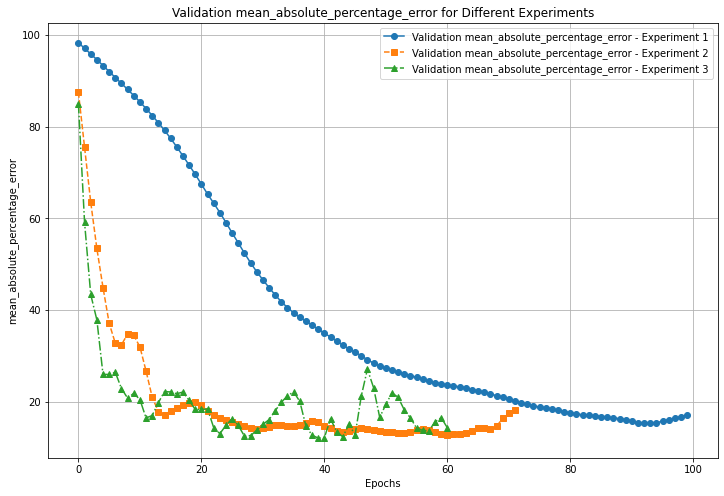

第1組參數: 在第 95 EPOCH
最好root_mean_square_error: 4.733718395233154
LOSS: 22.408090591430664
第2組參數: 在第 52 EPOCH
最好root_mean_square_error: 3.6316277980804443
LOSS: 13.188720703125
第3組參數: 在第 41 EPOCH
最好root_mean_square_error: 3.2278177738189697
LOSS: 10.418807983398438


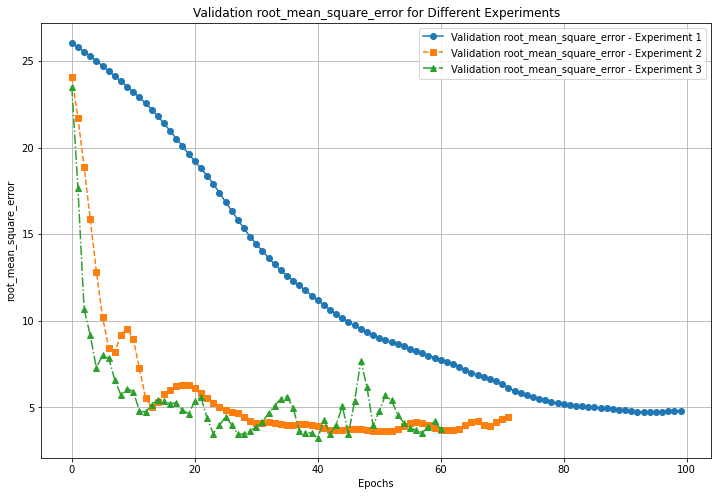

In [70]:
# Define parameters for experiments
experiments = [
    {'hidden_layers': 1, 'hidden_units': 1000, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 2, 'hidden_units': 1000, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layers': 3, 'hidden_units': 1000, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001},
]

histories = []
batch = [256, 256, 256, 256]
patient = [20, 20, 20, 20]
for bsize, exp, patient in zip(batch, experiments, patient):
    model = create_model(exp['hidden_layers'], exp['hidden_units'], exp['activation'], exp['optimizer'], exp['learning_rate'])
    history = train_model(model, epochs=100, batch_size=bsize, early_stop = patient)
    histories.append(history)

#PLOT
plt.figure(figsize=(12, 8))

linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'x']

for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_val_mae = history_df['val_mae'].min()
    best_val_epoch = history_df['val_mae'].idxmin() + 1
    best_val_loss = history_df.loc[best_val_epoch - 1, 'val_loss']

    print(f"第{i+1}組參數: 在第 {best_val_epoch} EPOCH\n最好MAE: {best_val_mae}\nLOSS_mse: {best_val_loss}")
    plt.plot(history_df['val_mae'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation MAE - Experiment {i+1}')

plt.title('Validation MAE for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))

linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'x']
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_val_mean_absolute_percentage_error = history_df['val_mean_absolute_percentage_error'].min()
    best_val_epoch = history_df['val_mean_absolute_percentage_error'].idxmin() + 1
    best_val_loss = history_df.loc[best_val_epoch - 1, 'val_loss']

    print(f"第{i+1}組參數: 在第 {best_val_epoch} EPOCH\n最好mean_absolute_percentage_error: {best_val_mean_absolute_percentage_error}\nLOSS: {best_val_loss}")
    plt.plot(history_df['val_mean_absolute_percentage_error'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation mean_absolute_percentage_error - Experiment {i+1}')
plt.title('Validation mean_absolute_percentage_error for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('mean_absolute_percentage_error')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))

linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'x']
for i, history in enumerate(histories):
    history_df = pd.DataFrame(history.history)
    best_val_root_mean_square_error = history_df['val_root_mean_square_error'].min()
    best_val_epoch = history_df['val_root_mean_square_error'].idxmin() + 1
    best_val_loss = history_df.loc[best_val_epoch - 1, 'val_loss']

    print(f"第{i+1}組參數: 在第 {best_val_epoch} EPOCH\n最好root_mean_square_error: {best_val_root_mean_square_error}\nLOSS: {best_val_loss}")
    plt.plot(history_df['val_root_mean_square_error'], linestyle=linestyles[i], marker=markers[i], linewidth=1.5, label=f'Validation root_mean_square_error - Experiment {i+1}')
plt.title('Validation root_mean_square_error for Different Experiments')
plt.xlabel('Epochs')
plt.ylabel('root_mean_square_error')
plt.legend()
plt.grid(True)
plt.show()